<center>
<font color='green'/><h1 style="text-align:center; color:red"> ISAT 341: Machine Learning and Data Science with Python </h1>

<font color='blue'/><h3 style="text-align:center; color:blue">Lab11-Final Exam (Part II) :Implementing an Adaptive Linear Neuron and Gradient Descent in Python</h3>
    
<h3 style="text-align:center; color:blue";>(Supervised Learning: Classification of the SciKit Learn Digits Dataset) </h3>
</center>



<img src="images/adaline.png" width =300; height = 300>

## Objectives
* Reuse and modify code from previous labs
* Understand and Implement Gradient Descent in Python
* Extend the MCP and Rosenblatt Perceptron model developed in Python to include Gradient Descent
 * Implement this ADAptive LInear NEuron classifier (Adaline) and Gradient Descent in Python
* Mathematically Extend the Perceptron Binary Model to a MultiClass Model (Numpy Linear Algebra)
* Use the Python Programming Language to Implement Frank Rosenblatt’s perceptron learning rule based on the MCP neuron model.
* Use NumPy matrix products and other Numpy features (arrays and methods) to create a subset of handwritten digits
* Train the Adaline model for multiclass classification on subset of handwritten digits
* Implement a Sigmoid Perceptron Class that includes Gradient Descent developed by  Generative Artificial Intelligence (GenAI) to compare and contrast to our Adaline model.
* Use and compare the GenAI Perceptron model to the model built from scratch using  object-oriented python.
* Create Predictive Models
* Perform Model Evaluation
    * Model Score and Accuracy
    * Confusion Matrix
* Plot the Cost (loss) Function

## <font color='orange'/>Class Adaline with Gradient Descent in Python

As we indicated in Part I, the Perceptron rule and the Adaline rule are very similar. To implement the Adaline learning rule, we only need to take the Perceptron Class that we used earlier and modify the fit method so that the weights are updated by minimizing the cost function by gradient descent. The COMPLETE Python Class for implementing Adaline using gradient descent is:
<img src="images/class_adaline.png" width = 600; height = 300>

### <font color = 'green'/>1-TO DO : Carefully enter the code for the Python class AdalineGD in the empty cell below the heading.
#### <font color='blue'/>Make sure you examine and understand every line of code in the AdalineGD class after you enter it below

### <font color='red'/> class Adaline: <font color='blue'/>Implementing an Adaptive Linear Neuron in Python
#### <font color='blue'/> Minimizing cost functions with gradient descent

In [1]:
class AdalineGD(object):\
    
    def __init__(self, eta=0.1, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    
    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.1, size=1 + X.shape[1])
        
        self.cost_ = []
        
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        '''Calculate Net Input'''
        return np.dot(X, self.w_[1:] + self.w_[0])
    
    def activation(self, X):
        '''Compute Linear activation'''
        return X
    
    def predict(self, X):
        '''Return class label after unit step'''
        return np.where(self.activation(self.net_input(X))>= 0.0, 1,0)

<img src= "images/converge_diverge_models.png" width=700>


### <font color='green'/> Standard imports

In [2]:
# Standard scientific Python imports
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

# <font color='orange'/>Using the MNIST Dataset with the Perceptron Classification Model 
When one learns how to program, there's a tradition that the first thing you do is print "Hello World." Just like programming has Hello World, machine learning has MNIST.

MNIST is a simple computer vision dataset. It consists of images of handwritten digits like these:
<center>
    <img src="images/mnist_image.png" width=250; height=200>
</center>

It also includes labels for each image, telling us which digit it is. For example, the labels for the above images are 5, 0, 4, and 1.

###  <font color='green'/> 2-TO DO: Loading Data
Use `Pandas` to load MNIST data into a dataframe. <font color='red'/> Name the dataframe df_mnist. Also display the entire dataset in the second cell.

In [3]:
df_mnist = pd.read_csv('mnist_datasets/mnist_784.csv',  low_memory=False)

###### <font color='orange'/>Code to dispaly the entire data in the dataframe has been provided for you below

In [4]:
df_mnist

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5


### <font color='green'/> 3-TO DO:Print the Shape of the data
print the shape of the data in the *dataframe* in the cell below

In [5]:
print(df_mnist.shape)

(70000, 785)


There are 70,000 images and each image has 784 features (each image is 28 x 28 pixels and each pixel represents a feature of an image). Each image of the MNIST dataset is encoded in a 784 dimensional vector, representing a 28 x 28 pixel image. Each pixel has a value between 0 and 255, representing the pixel's intensity, from 0 (white) to 255 (black) corresponding to the grey-value of a pixel.
###### <font color='red'/>make sure you understand why the shape is displaying that there are 785 columns!

### <font color='green'/> 4-TO DO: Processing Data
In the cell below, use Pandas `loc` to create the feature matrix and column vector. This can be done as follows to create the *feature matrix*:

Since the last column in the dataset is the *class* attribute , we need to select all columns except one column in Pandas DataFrame. To do this we can use  `df.loc[:, df.columns != <column name>]` as follows:

#### <font color='green'/>  Steps

1)  Initialize a variable *col* with column name that you want to exclude.

2)  Use `df.loc[:, df.columns != col]` to create another DataFrame excluding a particular column.

3) To make sure you have extracted the columns you expect, you can print the DataFrame without `col` column.
###### <font color='red'/>WARNING: We need these to be numpy arrays so make sure you convert them during this process. See your labs, etc.

In [6]:
#create feature matrix and target vector from dataframe
X = np.asarray(df_mnist.loc[:, df_mnist.columns != 'class'])
y = np.asarray(df_mnist.iloc[:,-1:])

### <font color='green'/> 5-TO DO: Simple Data Exploration for Images

In the cell below print the following:
```python
print('This is how X[0] looks when "flattened" \n{}'.format(X[0]))
print ('\nThis is how X[0] looks when "reshaped" to image format \n{}'.format(X[0].reshape(28,28)))
print('\nThis is simply the target vector value that is associated with the image {}'.format(y[0]))
```
###### <font color='orange'/>You should take a moment and look at the output. Notice which are 1D or 2D arrays and the values they hold

In [7]:
print('This is how X[0] looks when "flattened" \n{}'.format(X[0]))
print ('\nThis is how X[0] looks when "reshaped" to image format \n{}'.format(X[0].reshape(28,28)))
print('\nThis is simply the target vector value that is associated with the image {}'.format(y[0]))

This is how X[0] looks when "flattened" 
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 2

###  <font color='green'/> 6-TO DO:Create a subset of the digits data using only the *zeroes and ones* 

<font color='red'/>COMMENT: I have done this part for you but you should make sure you understand what the code does and how the subset of images is being created from the larger dataset. DO NOT ALTER THIS CODE UNLESS YOU ARE ASKED TO. **YOU MUST USE THE VARIABLE NAMES GIVEN!**

In [8]:
zero_one_indices = np.sort(np.concatenate((np.where(y == 0)[0], np.where(y == 1)[0])))

In [9]:
zero_one_images = X[zero_one_indices] 
zero_one_labels = y[zero_one_indices]
zero_one_labels.shape

(14780, 1)

### <font color='green'/>7- TO DO:  display an image
Display the image with index = 11

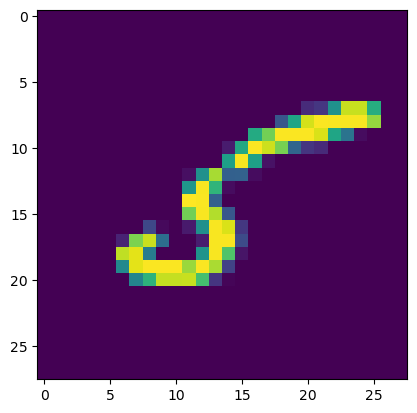

In [10]:
i = 11
plt.imshow(X[i].reshape(28,28))

### <font color='green'/>8- TO DO Is the Training Dataset Balanced?
#### <font color='blue'/> Data Visualization
Plot a histogram (**bar chart!**) of the dataset *class labels* to make sure we have a balanaced dataset, i.e.we want to figure out how often each number is represented in the dataset. This is important when we are trying to eliminate **algorithmic bias** in our machine learning models. <font color='red'/>WARNING: Your code should be general and should be able to plot *any* two digits selected as the subset.

([<matplotlib.axis.XTick at 0x1b0b7323090>,
 [Text(0, 0, '1'), Text(1, 0, '2')])

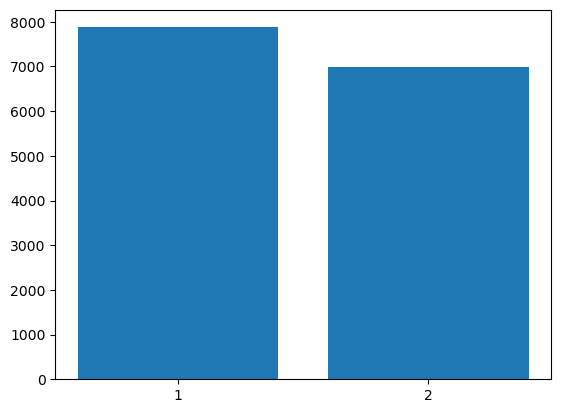

In [11]:
y1 = y.flatten()

digits = [1,2]  # Modify this list to select different digits

# Count occurrences of each digit
counts = np.bincount(y1)

# Plot
plt.bar(np.arange(len(digits)), counts[digits])
plt.xticks(np.arange(len(digits)), digits)

### <font color='green'/>9-TO DO:Split the data into Training and Testing Sets
Scikit learn contains a function called the **train_test_split** function  that will randomly shuffle the dataset and then splits it into two datasets: a **training set** used to build the model and a **test set** to assess and evaluate how well the model works on unseen data. **Use a 75%/25% train-test split**. 
<br><br><font color='red'/>You should also use `shuffle=True` and `random_state=0` in your split.

In [12]:
from  sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0, shuffle=True)

#y_train = y_train.flatten()
#y_test = y_test.flatten()

### <font color='green'/> 10- TO DO:Look at the *shape* of the data (rows and columns) *after* splitting it into training and testing sets
**Enter your code in the next TWO cells below**

In [13]:
print('X_train Shape of the data : {}'.format(X_train.shape))
print('y_train Shape of the data : {}'.format(y_train.shape))

X_train Shape of the data : (52500, 784)
y_train Shape of the data : (52500, 1)


In [14]:
print('X_test Shape of the data : {}'.format(X_test.shape))
print('y_test Shape of the data : {}'.format(y_test.shape))

X_test Shape of the data : (17500, 784)
y_test Shape of the data : (17500, 1)


### <font color='green'>11- TO DO: Code to plot several images</font>
<font color='red'/>COMMENT: I have done this part for you. I have created it as a pyton callable function since we will need to use it later. You should make sure you understand what the code does and how the subset of images is being plotted

In [15]:
def plot_example(X, y):
    """Plot the first 5 images and their labels in a row."""
    plt.subplots(figsize=(9, 4))
    for i, (img, y) in enumerate(zip(X[:5].reshape(5, 28, 28), y[:5])):
        #subplot five images on one row
        plt.subplot(1, 5, i+1) 
        plt.imshow(img)
        plt.xticks([])
        plt.yticks([])
        plt.title(y)
    plt.show()

call the function to plot a subset of images in the training set

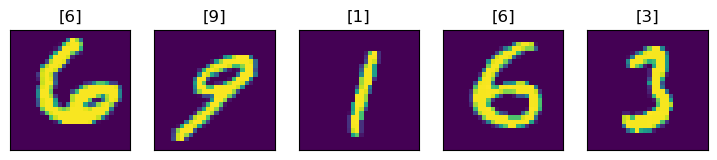

In [16]:
plot_example(X_train, y_train)

### <font color='blue'/> Scaling the features of a dataset 

<h4 style="text-align:left; color:red";>IMPORTANT: Standardizing the features:</h4>

* There are two common approaches to bring different features onto the same scale: **normalization** and **standardization**.  Most often, normalization refers to the rescaling of the features to a range of [0, 1], which is a special case of min-max scaling. To normalize our data, we can simply apply the min-max scaling to each feature column.

* Standardization of datasets (feature scaling) is a common requirement for many machine learning and optimization algorithms implemented in scikit-learn; they might behave badly if the individual features do not more or less look like standard normally distributed data, i.e., Gaussian with zero mean and unit variance.

### <font color='green'/>12-TO DO: Scale or Noramlize the Data
##### Use the scikit-learn  StandardScaler (MinMaxScaler) to scale (normalize) the training and testing datasets
#### <font  color='red'/>NOTE: Create a decision structure which uses either the MinMaxScaler or the StandardScaler depending on the value of a boolean variable for normalizing or scaling the data. **SET YOUR BOOLEAN SO THAT IT STARTS WITH THE STANDARD SCALER**.

In [ ]:
X.max(), X.min()

X = X/255.0
X.max(), X.min()

### <font color='green'/>13-TO DO: Build Adaptive Linear Neuron Model
#### Instantiate the AdalineGD class train the model on the data. Use the following variable names and range of parameters:

#### The Model using the Adaline Classifier:

- model name  = ada
- n_iter = you choose: must be in range 100 to 1000
- eta = you choose: must be in range, 1.0e-4 to 1.0e-8
- random_state = 1

You can use the default values for the rest of the parameters. <font color='red'/>Your model MUST converge with accuracy > 97%

In [ ]:
# Instantiate AdalineGD class
ada = AdalineGD(n_iter=101, eta=1.0e-6, random_state=1) 

# Train the model on the data
ada.fit(X_train, y_train)

### <font color='green'/>14-TO DO: Plot the cost function versus the number of epochs
Plot the cost function vs. the epochs (you may need to slightly modify some previous plotting code). Use appropriate labels for the axes and title. The title should say the name of the model and the learning rate being used. **Save the generated figure with the name *adaline.png***  

### <font color='green'/> 15-TO DO:Model Evaluation and Performance

Use the test set to create the model's predictions. Name the prediction vector **y_pred** as in previous notebooks. Make sure you display the predictions in the **y_pred** vector. Also, print the **true labels** so we can visually compare the two vectors.

**Enter your code in the cell below:**



### <font color='green'/> 16-TO DO:Predict the label for a single image

Use class Adaline's built-in *predict method* to test the model's predictive performance for the *second* image in X_test_std. **Display the image, the predicted label and the true label**

**Enter your code in the next two cells below:**

In [ ]:
#code for prediction (COMPLETE SENTENCES!)

In [ ]:
#code to display predicted image

### <font color='green'/>17-TO DO:Print the number of misclassifications using numpy 

### <font color='green'/> 18-TO DO:Plot some misclassified images
Write code for a simple decision structure such that if the misclassifications exceed five, then plot five(5) images of some of the predictions that **went wrong**. Do not rewrite the plotting code or ANY plotting code here except a call to the plotting code given in step 11. AGAIN, you MUST use the plotting code defined earlier. HINT: create an error filter using the numpy code for misclassifications and use that expression to call the plotting function.

```python
#create array of true-false values
values=[True, True, False,True, False ]
#operate on it with np.where
np.where(np.array(values))
# note that this returns the indices of the True values
#print(np.where(np.array(values)))

# now look at this comparrison of operations
np.where(np.array(values))[0] == np.array(values).nonzero()[0]

# now look at this comparrison of operations
np.where(np.array(values))[0] == np.array(values).nonzero()[0]

```
Note that these two comparisons are True! We know that `np.array(values).nonzero()` returns only values that are non-zero (True). This means that `np.where(np.array(values)` *does the same thing* as `np.array(values).nonzero()`! One takeaway is that since  `np.where(np.array(values)` has to return something  when *it* is true from the *values* that are fed into it, it rerutns the *index* of the value when the value is true. We can use this and the indices as a *filter* or *mask*

In [ ]:
# code below for five images of misclassifications 


### <font color='green'/> 19-TO DO: Show the *Classification Report* for the`ada` Classification Model

### <font color='green'/>20-TO DO: Display the *Pretty Confusion Matrix*  for the`ada` Classification Model
<font color='red'/>NOTE: You have to provide the class labels here.Think!

## <font color='orange'/>Questions

### <font color='green'/> Q1 (4 points): Using the MinMaxScaler

Before you begin, enter the values from the run above where you used the `StandardScaler`. Then run the identical code *only changing to the `MinMaxScaler` for scaling the data*. <font color='red'>  If your model using `MinMaxScaler`  does not achieve an accuracury > 75% OR if it diverges, then tweak the parameters until you get > 75% accuracy.</font> Enter your results below:

- misclassifications using StandarScaler = ??

- misclassifications using MinMaxScaler = ??

<font color='red'/> NOTE: After this question, replace the `MinMaxScaler` code with the `StandardScaler` code and use `StandardScaler` for the rest of the project. **RE-RUN YOUR CODE USING THE STANDARD SCALER.**.

### <font color='green'/> Q2 (10 points): Adding an accuracy score method to your Adaline class (accuracy > 97%)
Using **only** numpy (and of course python), modify (enhance) the class Adaline to give it a *built-in* method to return the accuracy of the trained classification mode. Your method **must** behave like scikit-learn's scoring method. That is, a user should be able to call it with code like: `ada.score(X_test_std, y_test)`. After you have modified your code, demonstrate it by calling the method with a print statement in the cell below. Record a copy of your instantiated model (showing parameters you used) in the **markdown** cell below:

<font color='blue'/> Your markdown here

<font color='green'/>Copy and paste ONLY your model here (adaline StandarScaler model MUST have accuracy > 97% ):

<font color='green'/>Copy and paste ONLY your model here (adaline MinMaxScaler model MUST have accuracy > 75% ):

> adaline model with best performance: 

### <font color='green'/>Q3 (10 points)  Carefully enter the code for the Generative AI Perceptron Classification Model 
In **one** cell below, copy and enter the code from the image above to build and use to classifiy the subset of the data with the 0, 1 subset of images you used in this exam. Print the accuracy, misclassifications and the confusion matrix.

<font color='red'/>Instantiate the GenAI perceptron model with thes parameters: ` learning_rate=0.0003`, `epochs = 100`, 

```python
#### Example usage:
ppnGenAI = PerceptronGenAI(input_size=X_train_std.shape[1])
ppnGenAI.fit(X_train_std, y_train, learning_rate=0.0003, epochs=100)
```
## <font color = 'orange'/>class PerceptronGenAI: A GenAI Sigmoid Perceptrom model with Gradient Descent

#### <font color='blue'/>Make sure you examine and undersatnd every line of code in the PerceptronGenAI  class after you enter it below

<img src="images/class_PerceptronGenAI.svg" width = 600; >


<b><font color = 'orange'/> In this GenAI code:

- The `sigmoid_derivative` method calculates the derivative of the sigmoid function, which is used in the gradient descent update rule.
- In the `fit` method, the gradient descent update rule is applied to adjust the weights and bias based on the error multiplied by the derivative of the sigmoid function.
- The learning rate controls the step size in the direction of the steepest descent in the error surface, and the number of epochs determines the number of iterations over the entire dataset for training.
    
<font color='red'/>Instantiate the GenAI perceptron model with these parameters: ` learning_rate=0.0003`, `epochs = 100`, 

```python
#Example usage:
ppnGenAI = PerceptronGenAI(input_size=X_train_std.shape[1])
ppnGenAI.fit(X_train_std, y_train, learning_rate=0.0003, epochs=100)
```

In [ ]:
# Example usage:




# Test the trained GenAI perceptron
for i in range(len(X_test_std)):
    print(f"Input: {y_test[i]}, Predicted Output: {ppnGenAI.predict(X_test_std[i]).round()}")

## <font color='red'/>IMPORTANT:

<font color='red-orange'>You will note that because we are usinng the sigmoid function in out GenAI perceptron, its output is a real number and NOT an integer. This means you MUST `round` the results!  This will be important whenever you call the `predict`method </font>

### <font color='green'/> Q4 (5 points): Add an accuracy score method to your `GenAI` class
Using **only** numpy (and of course python), modify (enhance) the class PerceptronGenAI to give it a *built-in* method to return the accuracy of the trained classification model. Your method **must** behave like scikit-learn's scoring method. That is, a user should be able to call it with code like: `ppnGenAI.score(X_test_std, y_test)`. After you have modified your code, demonstrate it by calling the method with a print statement in the cell below.

### <font color='green'/> Q5 (5 points): Compute and display the misclassifications of the `GenAI` model

### <font color='green'/>Q6 (4 points) Display the Confusion Matrix for the  Generative AI  Classification Model in Q5
Enter your code in **one** cell below: <font color='red'/><font color='red'/>WARNING:  use the GenAI name from Q3 for nameing  the prediction vector in this part to avoid future conflicts, i.e. use the name `y_pred_ppnGenAI`

<center>
    
## <font color='orange'/>Statistics for Evaluating the Performance of Machine Learning Models</h1>

</center>

We can compare two supervised machine learning models using the same training dataset by applying the classical hypothesis testing paradigm. Our measure of model performance is the test-set error rate. Below, we state the problem in the form of a *null hypothesis*.

>There is no significant difference in the test set error rate of two supervised machine learning models, $M_1$ and $M_2$, built with the same training dataset.

Although there are several possible test set scenarios we can use, we will take the approach that allows us to compare performance between models when:
- *the **same** test dataset is used to compare the models, and*
- *the comparison is is based on the overall classification correctness of the models.* 

While this is a simple approach, it would perhaps be more straightforward to compare model performance using **two independent testing datasets selected randomly from a a pool of sample data.** However, this approach is feasible only if there is a large supply of data available from which random test sets can be extracted. Thus, when smaller-sized datasets are all we have to work with, a single test set used on both models is probably the only possibility.


### Comparing Models with Independent Test Data
The simpler approach that we will take is to use a technique that compares the overall classification correctness of the models. *It shoud be noted that this method is equally valid whether we have two independent test datasets or only a single dataset to use with both models.* 

The most general form of the statistic for comparing the performnce of two classifier modesl  $M_1$ and $M_2$ is

\begin{eqnarray}
 P= \frac{|E_{1} - E_{2}|}{\sqrt{q(1-q)(1/n_{1} + 1/n_{2} )}} 
\end{eqnarray}


<div style="width:400px; margin:2px">
  
    
| **where:** |  |  |
|:------|:------|:-----|
$E_1$| is the error rate for model $M_1$| |
|$E_2$|is the error rate for model $M_2$| |
|$ q $| = $\frac{(E_1 + E_2)}{2}$ is the error rate average||
|$n_1$|is the number of instances in test set A||
|$n_2$|is the number of instances in test set B||

</div>
<p>You should note that $q(1-q)$ is the variance score computed using the <b>average</b> of the two error rates. When we have a <em>single</em> test set of size $n$ that we use for both models, then the formula simplifies to:</p>


\begin{eqnarray}
 P= \frac{|E_{1} - E_{2}|}{\sqrt{q(1-q)(2/n )}} 
\end{eqnarray}


With either of the above equations, if, for the value of $P$ we find $P$ $\geq$ 2, then we can be 95% confident that the difference in the test set performance is statistically significant. 

In this project, we shall use this simplified version of the relation since we only have one test dataset for both models.

### <font color='green'/>Q7 (10 points) Comparing the Performance of two Supervised Classification Models

### Model Performance Comparison of two Classifiers

Using the **ada model** (with accuracy>90%) and the **GenAI perceptron model** (with accuracy>97%) in **Q3**, compare the performance of the models using the above statistic when we only have one test set. To do this you need to calculate (**and print**)  in each cell below, the following <font color='red'/>COMMENT: Your code must be general. you MUST use the varible names given below!:

$E_1$ : the error rate for model $M_1$, your Adaline Model

**Enter your code below:**

$E_2$ is the error rate for model $M_2$, your Scikit-Learn Perceptron Model

**Enter your code below:**

$ q $ = $\frac{(E_1 + E_2)}{2}$ ,  the error rate average

**Enter your code below:**

$n_1$, the number of instances in test set A

**Enter your code below:**

$n_2$,  the number of instances in test set B

**Enter your code below:**

#### Using Python, write a simple decision construct to compute and display $P$, depending on whether  $P$ $\geq$ 2. Use a complete sentence in your output.

**Enter your code below:**

###### <font color='purple'/>Give a brief comparative summary of the two models and your analysis in the cell below. (Keep it short! 2-4 sentences!)

### <font color='green'/>Q8 (6 points) Model Persistence - Save/Load the trained classifier

### <font color='orange'> Pickle (serialize) and save the trained *adaline* classifier to a folder. 
Enter your code in the cell below.

### <font color='orange'> Load the saved trained classifier into memory
Enter your code in the cell below.

### <font color='orange'> Test the re-loaded classifier
Use the re-loaded classifier to classify an image and compare its classification to the true value.  Use an image from the normalized test set with <font color='red'>index = 25</font>. Use complete sentences in the output for the classifier's prediction such as "The reloaded classifier predicts the image is number __".
    
Enter your code in the cell below.

### <font color='green'/>Q9 (6 points) Predictions with images (from Adaline)
Use your prediction vector, y_pred, **from ada (when accuracy > 97%)** to display the first twelve(12) images and the predictions. Display these on 3 rows with 4 images per row .

### <font color='green'/>Q10 (6 points) Predictions with images (from GenAI)
Use your prediction vector, y_pred, **from GenAI (when accuracy > 97%)** to display the first twelve images and the predictions. Display this on 3 rows with 4 images per row .

<center>
    
# <font color='red'/>End of Exam!
    
</center>